# Data Preprocessing and Feature Engineering

In [1]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
data = pd.read_csv('adult_with_headers.csv')
data.head()
    

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Summary Statistics

In [2]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Missing Values

In [3]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Scaling the Data

In [4]:

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

standard_scaled_data = pd.DataFrame(scaler_standard.fit_transform(data[numeric_columns]), columns=numeric_columns)
minmax_scaled_data = pd.DataFrame(scaler_minmax.fit_transform(data[numeric_columns]), columns=numeric_columns)

standard_scaled_data.head()
    

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


## Encoding Categorical Data

In [5]:

categorical_columns = data.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse_output=False)
label_encoder = LabelEncoder()

encoded_data = data.copy()

for col in categorical_columns:
    if data[col].nunique() < 5:
        one_hot_encoded = pd.get_dummies(data[col], prefix=col)
        encoded_data = pd.concat([encoded_data, one_hot_encoded], axis=1).drop(columns=col)
    else:
        encoded_data[col] = label_encoder.fit_transform(data[col])
        
encoded_data.head()
    

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,False,True,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,True,False,True,False


## Feature Engineering

In [6]:

# Feature engineering with bins for 'hours_per_week'
encoded_data['age_bins'] = pd.cut(encoded_data['age'], bins=[0, 25, 50, 75, 100], labels=['Young', 'Middle-aged', 'Senior', 'Old'])
encoded_data['hours_per_week_bins'] = pd.cut(encoded_data['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['Low', 'Medium', 'High', 'Very High'])
encoded_data.head()
    

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_bins,hours_per_week_bins
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False,Middle-aged,Medium
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False,Middle-aged,Low
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False,Middle-aged,Medium
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,False,True,True,False,Senior,Medium
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,True,False,True,False,Middle-aged,Medium


## Outlier Detection with Isolation Forest

In [7]:

iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(data[numeric_columns])
encoded_data['outlier'] = outliers
encoded_data.head()
    

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_bins,hours_per_week_bins,outlier
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,False,True,True,False,Middle-aged,Medium,1
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,False,True,True,False,Middle-aged,Low,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,False,True,True,False,Middle-aged,Medium,1
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,False,True,True,False,Senior,Medium,1
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,True,False,True,False,Middle-aged,Medium,1


## Feature Importance Visualization

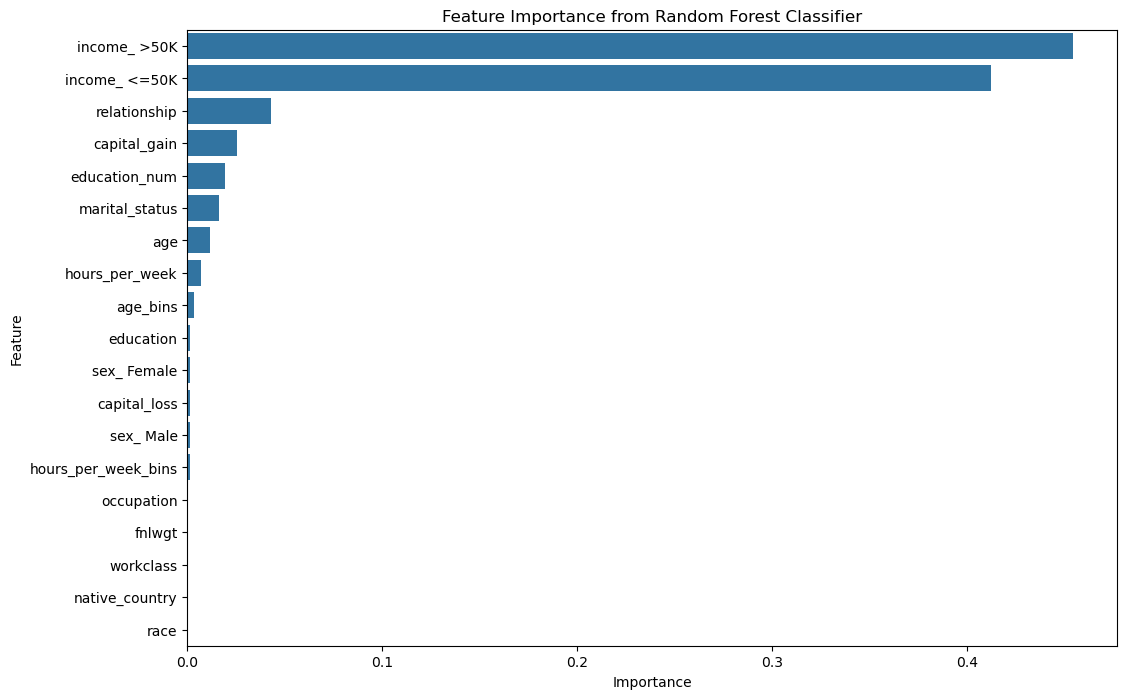

In [8]:

# Ensuring that categorical features are properly encoded for model training
encoded_data['age_bins'] = label_encoder.fit_transform(encoded_data['age_bins'].astype(str))
encoded_data['hours_per_week_bins'] = label_encoder.fit_transform(encoded_data['hours_per_week_bins'].astype(str))

# Dropping unnecessary columns and preparing data for classification
X = encoded_data.drop(columns=['outlier', 'income'], errors='ignore')
y = data['income']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Getting feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Visualizing feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.show()
    